In [1]:
%load_ext watermark
%watermark

2020-10-13T21:17:32-05:00

CPython 3.7.6
IPython 7.12.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,10) # 10 pulgadas de ancho y 10 de alto para todos los plots

#### Lectura de datos

In [4]:
vehiculos = pd.read_pickle('../../_data/vehiculos.3.variables_agrupadas.pkl')

In [5]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo             object
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

### Distribución de variables numéricas

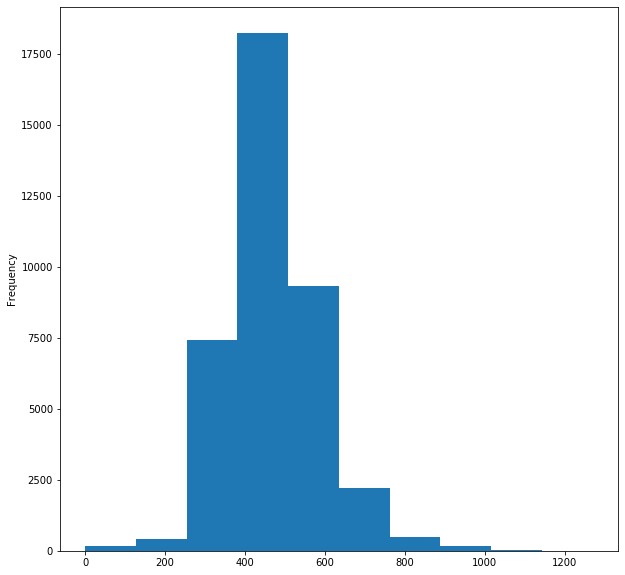

In [6]:
vehiculos['co2'].plot.hist();

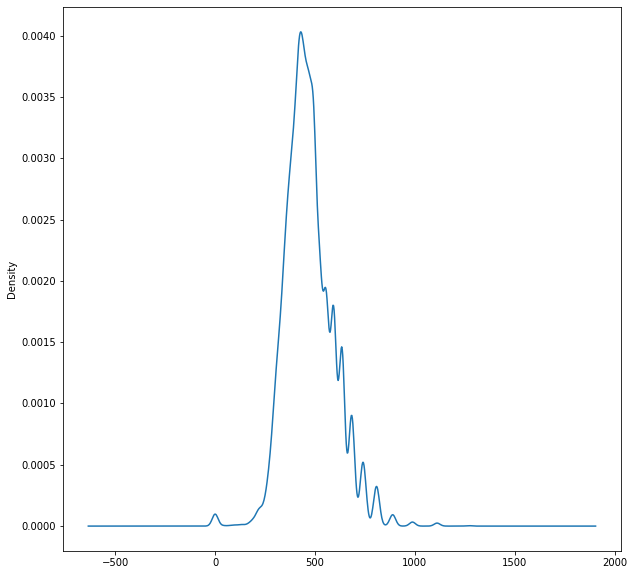

In [7]:
vehiculos['co2'].plot.kde();

In [8]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribucion de la variable {}'.format(col))
    plt.show()

In [9]:
columnas_numericas = vehiculos.select_dtypes(['int', 'float']).columns

In [10]:
from ipywidgets import interact, fixed

In [11]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(vehiculos));

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

In [12]:
vehiculos['cilindros'].value_counts(normalize=True)

4.0     0.384760
6.0     0.349141
8.0     0.219042
5.0     0.020055
12.0    0.015198
3.0     0.006163
10.0    0.003995
2.0     0.001436
16.0    0.000209
Name: cilindros, dtype: float64

In [16]:
../../_media/dnormal.png

SyntaxError: invalid syntax (<ipython-input-16-4a350a08ec19>, line 1)

In [17]:
from scipy import stats

In [18]:
def normalidad_variable_numerica(col):
    stats.probplot(vehiculos[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

In [19]:
interact(normalidad_variable_numerica, col=columnas_numericas);

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

In [21]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(vehiculos[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna co2 no sigue una distribución normal
Columna consumo_litros_milla no sigue una distribución normal


C:\Users\Le_an\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Le_an\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Le_an\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Le_an\anaconda3\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


### Distribución variables categóricas

In [20]:
def distribucion_variable_categorica(col):
    vehiculos[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [22]:
columnas_categoricas = vehiculos.select_dtypes(['object', 'category']).columns

In [23]:
interact(distribucion_variable_categorica, col=columnas_categoricas);

interactive(children=(Dropdown(description='col', options=('fabricante', 'modelo', 'transmision', 'traccion', …

### Conclusiones

- Ninguna variable numérica sigue una distribución normal

- la variable numérica cilindros tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro)

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)

- 65% de los vehiculos usan gasolina normal

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango

- 70% de los vehiculos usan traccion a las dos ruedas

- dos tercios de los coches tienen transmision automática

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total)
- Los mayores fabricantes en cuanto a vehiculos analizados son los estadounidenses. Esto tiene sentido ya que la EPA es la agencia americana y probablemente es la que tiene más interes en estudiar coches de USA